# Scikit Learn & Preprocessing Part 2

## Import python modules

In [5]:
# import scikit learn
import sklearn

from sklearn import datasets
# --------------------------------------
from sklearn import preprocessing
# --------------------------------------
from sklearn.model_selection import train_test_split
# --------------------------------------
from sklearn.preprocessing import LabelEncoder
# --------------------------------------
from sklearn.decomposition import PCA
# --------------------------------------
from sklearn.model_selection import GridSearchCV 
# --------------------------------------
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
# --------------------------------------
import warnings

import numpy as np
import pandas as pd
# --------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
# --------------------------------------
# show several outputs in one cell. 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
# --------------------------------------
warnings.simplefilter("ignore")
%matplotlib inline
# --------------------------------------

## The bicycle rental dataset

Dataset description:
* **outstanding_branch** - outstanding branch name, with highest number of rentals  
* **popular_color** - the most popular  color of rented bicycle for the day
* **month_number** - number of month (between 1 to 12)
* **day_of_week** - days of week ('Sun', 'Mon', ...)
* **working_day** - is this a working day or not
* **temperature** - normalized temperature
* **humidity** - normalized humidity
* **wind_speed** - normalized wind speed
* **number_registered** - number of registered bicycles
* **count_rentals** - number of rented bicycles 

## Loading dataset

### Read the dataset from csv
Let's read the dataset and display some information

In [4]:
df = pd.read_csv('./data/bicycle_rental.csv', header=0, sep=',') 
df.head(3)

,outstanding_branch,popular_color,month_number,day_of_week,working_day,temperature,humidity,wind_speed,number_registered,count_rentals
0,Holon,gray,1,Sat,NO,0.344167,0.805833,0.160446,654,985
1,Beer Sheva,gray,1,Sun,NO,0.363478,0.696087,0.248539,670,801
2,Holon,blue,1,Mon,YES,0.196364,0.437273,0.248309,1229,1349


### Split to X and y

Assume that the **'popular_color' column** functions as the target value.<br/>
Is it a classification problem or a regression problem?<br/>

We need to split the data to feature vectors and a target value:

In [5]:
target_column = 'popular_color'
y = df[target_column]
X = df.drop([target_column],axis=1)
X.head(3)
y.head(3)

,outstanding_branch,month_number,day_of_week,working_day,temperature,humidity,wind_speed,number_registered,count_rentals
0,Holon,1,Sat,NO,0.344167,0.805833,0.160446,654,985
1,Beer Sheva,1,Sun,NO,0.363478,0.696087,0.248539,670,801
2,Holon,1,Mon,YES,0.196364,0.437273,0.248309,1229,1349


0    gray
1    gray
2    blue
Name: popular_color, dtype: object

### Some Data Cleansing 
#### Remove rows or columns

We might want to use _boolean indexing_, and remove the data passing the condition.<br/>
In this case we want to find all the non-working days and filter them<br/>

Note that non working days includes rows which the value of "working_day" is 'NO'

In [6]:
non_work_days=X[(X["working_day"]=='NO')]
'rows passing condition:'
non_work_days.head()

'rows passing condition:'

,outstanding_branch,month_number,day_of_week,working_day,temperature,humidity,wind_speed,number_registered,count_rentals
0,Holon,1,Sat,NO,0.344167,0.805833,0.160446,654,985
1,Beer Sheva,1,Sun,NO,0.363478,0.696087,0.248539,670,801
7,Tel Aviv,1,Sat,NO,0.165000,0.535833,0.266804,891,959
8,Haifa,1,Sun,NO,0.138333,0.434167,0.361950,768,822
14,Haifa,1,Sat,NO,0.233333,0.498750,0.157963,1026,1248


**The `drop` method** removes rows or columns (by default it removes rows).<br/>

For more information goto the [pandas dataframe drop documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html)

In [7]:
X_work_days=X.drop(non_work_days.index)
y_work_days=y.drop(non_work_days.index)
'original #rows  : %d' %X.shape[0]
'after-drop #rows: %d' %X_work_days.shape[0]

'original #rows  : 731'

'after-drop #rows: 500'

Lets check how many values do the 'string' columns contain.<br/>

First We find the string columns.
Here we'll use the select_dtypes method (check the [select_dtypes documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.select_dtypes.html)):


In [11]:
X_work_days_obj_clmns = X_work_days.select_dtypes(include='object')
X_work_days_obj_clmns.head()

,outstanding_branch,day_of_week,working_day
2,Holon,Mon,YES
3,Beer Sheva,Tue,YES
4,Holon,Wed,YES
5,Beer Sheva,Thu,YES
6,Holon,Fri,YES


Lets validate the number of values after filtering and display the values of the 'working_day' column.
(check documentation for: [nunique](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.nunique.html) and [unique](https://pandas.pydata.org/docs/reference/api/pandas.Series.unique.html))

In [12]:
X_work_days_obj_clmns.nunique()
X_work_days_obj_clmns['working_day'].unique()

outstanding_branch    4
day_of_week           5
working_day           1
dtype: int64

array(['YES'], dtype=object)

So the values (of non-working days) were removed successfully.

It seems that the 'working_day' column doesn't provide (it contains only one value, let's remove it).<br/>
Note that setting the `axis` parameter to 1 (`axis=1`), will indicate that we are dropping columns

In [13]:
'original #columns  : %d' %X.shape[1]
X_work_days=X_work_days.drop('working_day',axis=1)
'after-drop #columns: %d' %X_work_days.shape[1]
X_work_days.head(3)
y_work_days.head(3)

'original #columns  : 9'

'after-drop #columns: 8'

,outstanding_branch,month_number,day_of_week,temperature,humidity,wind_speed,number_registered,count_rentals
2,Holon,1,Mon,0.196364,0.437273,0.248309,1229,1349
3,Beer Sheva,1,Tue,0.200000,0.590435,0.160296,1454,1562
4,Holon,1,Wed,0.226957,0.436957,0.186900,1518,1600


2    blue
3    blue
4     red
Name: popular_color, dtype: object

### Split to train and test

Assume the dataset is for a learning problem and it is not splitted to train and test.<br/>
We need to split the data to train and test and we could use the `sklearn.model_selection` module called `train_test_split` (for more information read the 
[train_test_split documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html))<br/>
In order to set a reproducible result, we set a predifined random state (the `random_state` parameter).

The following is an example of the usage:

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_work_days, y_work_days, test_size=0.15, random_state=42, shuffle=True)
X_train.head(3)
y_train.head(3)

,outstanding_branch,month_number,day_of_week,temperature,humidity,wind_speed,number_registered,count_rentals
445,Tel Aviv,3,Wed,0.531667,0.821250,0.089558,5108,6230
394,Beer Sheva,1,Mon,0.269167,0.400833,0.215792,3498,3624
101,Tel Aviv,4,Tue,0.502500,0.739167,0.274879,1777,2034


445     red
394     red
101    blue
Name: popular_color, dtype: object

## Some Feature Engineering:

### Transform string values to numeric  - case 1
Case 1 - values have an intuitive value 

Let's go back to the original dataset and display the values of our two 'string' features: 
* 'day_of_week'
* 'outstanding_branch'

In [15]:
# assume we are loading the train set:
trainset = pd.read_csv('./data/bicycle_rental.csv', header=0, sep=',') 

trainset['day_of_week'].unique()
trainset['outstanding_branch'].unique()

array(['Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri'], dtype=object)

array(['Holon', 'Beer Sheva', 'Tel Aviv', 'Haifa'], dtype=object)

The **'day_of_week' column** could be transfered to an <u>ordinal order</u> which make sense.<br/>
The **'outstanding_branch' column** doesn't have such an order.<br/>

We could transfer 'day_of_week' values to there ordinal order in the week.<br/>
(For more information visit the [pandas dataframe replace documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html))<br/>

**'is_work_day'** - We will use the Israeli week order as a new feature and remove the original one:

In [16]:
trainset['il_day_indx'] = trainset['day_of_week'].replace({'Sun':1, 'Mon':2, 'Tue':3, 'Wed':4, 'Thu':5, 'Fri':6, 'Sat':7})
# remove the original columns day_of_week':
trainset = trainset.drop(['day_of_week'],axis=1)
trainset.head(3)

,outstanding_branch,popular_color,month_number,working_day,temperature,humidity,wind_speed,number_registered,count_rentals,il_day_indx
0,Holon,gray,1,NO,0.344167,0.805833,0.160446,654,985,7
1,Beer Sheva,gray,1,NO,0.363478,0.696087,0.248539,670,801,1
2,Holon,blue,1,YES,0.196364,0.437273,0.248309,1229,1349,2


Great, but what about 'outstanding_branch'?<br/>
We will need to find another solution for 'outstanding_branch' ...

### Transform string values to numeric  - case 2
Case 2 - values don't have an intuitive value 

Let's check the frequency of the **'outstanding_branch' column** using the pandas series `value_counts` function.<br/>
(For more information check the [pandas series value_counts documentation](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html))

We call this a **histogram**: 

In [17]:
trainset['outstanding_branch'].value_counts()

Beer Sheva    195
Tel Aviv      185
Haifa         184
Holon         167
Name: outstanding_branch, dtype: int64

There are several ways to visualize histograms.<br/>
For instance, we could also visualize this using a `matplotlib` `bar` method, a series `hist` method from or an `sns` `countof` method  

<AxesSubplot:>

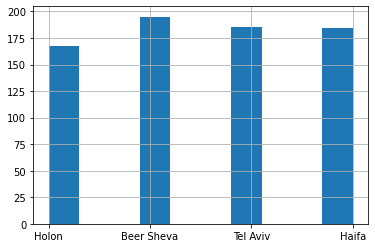

In [18]:
trainset['outstanding_branch'].hist()

In case we don't have an order in a categorical (string here) value, we could check for existence of the value.<br/>
The **pandas `get_dummies` method** does just that, by transferring each possible string value to a binary feature.<br/>
(For more information check the [pandas get_dummies documentation](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html))

Let's apply this for the 'outstanding_branch' column:

In [19]:
outstanding_branchs = pd.get_dummies(trainset['outstanding_branch'],prefix='branch_',drop_first=False)
df_binary = pd.concat([trainset,outstanding_branchs],axis=1).drop('outstanding_branch',axis=1)
df_binary.head()

,popular_color,month_number,working_day,temperature,humidity,wind_speed,number_registered,count_rentals,il_day_indx,branch__Beer Sheva,branch__Haifa,branch__Holon,branch__Tel Aviv
0,gray,1,NO,0.344167,0.805833,0.160446,654,985,7,0,0,1,0
1,gray,1,NO,0.363478,0.696087,0.248539,670,801,1,1,0,0,0
2,blue,1,YES,0.196364,0.437273,0.248309,1229,1349,2,0,0,1,0
3,blue,1,YES,0.200000,0.590435,0.160296,1454,1562,3,1,0,0,0
4,red,1,YES,0.226957,0.436957,0.186900,1518,1600,4,0,0,1,0


### Transfer continues numeric values to discrete

We have a couple of options to turn continues values to discrete ones.<br/>
Actually the feature values don't have to be continues.<br/>

We might want to divide int values to groups.<br/>
The **pandas `qcut` method**, does this by dividing the values into quantiles (For more information check the [pandas qcut documentation](https://pandas.pydata.org/docs/reference/api/pandas.qcut.html)).

Let's do this for the 'count_rentals' feature (number of rented bicycles).

In [20]:
cnt_descrete=pd.qcut(df_binary['count_rentals'], q=4,labels=[0,1,2,3])
cnt_descrete.name='cnt_descrete'
df_descrete = pd.concat([df_binary,cnt_descrete],axis=1).drop('count_rentals',axis=1)
df_descrete.head()

,popular_color,month_number,working_day,temperature,humidity,wind_speed,number_registered,il_day_indx,branch__Beer Sheva,branch__Haifa,branch__Holon,branch__Tel Aviv,cnt_descrete
0,gray,1,NO,0.344167,0.805833,0.160446,654,7,0,0,1,0,0
1,gray,1,NO,0.363478,0.696087,0.248539,670,1,1,0,0,0,0
2,blue,1,YES,0.196364,0.437273,0.248309,1229,2,0,0,1,0,0
3,blue,1,YES,0.200000,0.590435,0.160296,1454,3,1,0,0,0,0
4,red,1,YES,0.226957,0.436957,0.186900,1518,4,0,0,1,0,0


### Exercise 1 - Feature Engineering

In this exercise start with the original dataframe df.<br/>
1. Create a new feature (column) called 'is_work_time', which could contain 2 values:
  * 0 (for non-working time)
  * 1: for working time 
  * We consider Non working time, as one of the following (or more):  
    * a value of 'NO' for the 'working_day' column
    * Month number 7 or 8 (Summer month - July or August) for the 'month_number' column 
  * After creating this new column, remove the 'working_day' and the 'month_number' columns.
2. Create a 'work_day_order' column, containing the work day order as following:
  * 1 - beginning of week, including 'Sun' and 'Mon'
  * 2 - middle of the week, including 'Tue', 'Wed', 'Thu'
  * 3 - End of week, including 'Fri' and 'Sat'
  * Remove the original 'day_of_week' column.
3. Discretize 'popular_color' on existence bases of the colors (exists = 1, doesn't exist = 0).
   * Use 'is_color' as a prefix
4. Discretize 'wind_speed' into 5 parts, using the pandas qcut command 
   * The new column should be called 'wind_discrete'
   * remove the 'wind_speed' column

In [57]:
# assume we are loading the train set:
trainset = pd.read_csv('./data/bicycle_rental.csv', header=0, sep=',') 
trainset.head()

,outstanding_branch,popular_color,month_number,day_of_week,working_day,temperature,humidity,wind_speed,number_registered,count_rentals
0,Holon,gray,1,Sat,NO,0.344167,0.805833,0.160446,654,985
1,Beer Sheva,gray,1,Sun,NO,0.363478,0.696087,0.248539,670,801
2,Holon,blue,1,Mon,YES,0.196364,0.437273,0.248309,1229,1349
3,Beer Sheva,blue,1,Tue,YES,0.200000,0.590435,0.160296,1454,1562
4,Holon,red,1,Wed,YES,0.226957,0.436957,0.186900,1518,1600


In [59]:
# Exercise 1 - part 1 your solution:
is_work_time = pd.Series(np.ones(trainset.shape[0]), name='is_work_time', dtype=np.uint8)
is_work_time[(trainset.working_day == 'NO') | (trainset.month_number.isin([7, 8]))] = 0
my_trainset = pd.concat([trainset, is_work_time], axis=1).drop(['working_day', 'month_number'], axis=1)
my_trainset.head()

,outstanding_branch,popular_color,day_of_week,temperature,humidity,wind_speed,number_registered,count_rentals,is_work_time
0,Holon,gray,Sat,0.344167,0.805833,0.160446,654,985,0
1,Beer Sheva,gray,Sun,0.363478,0.696087,0.248539,670,801,0
2,Holon,blue,Mon,0.196364,0.437273,0.248309,1229,1349,1
3,Beer Sheva,blue,Tue,0.200000,0.590435,0.160296,1454,1562,1
4,Holon,red,Wed,0.226957,0.436957,0.186900,1518,1600,1


In [61]:
# Exercise 1 - part 2 your solution:
my_trainset2 = my_trainset.copy()
my_trainset2['work_day_order'] = my_trainset.day_of_week.replace({'Sun': 1, 'Mon': 1, 'Tue': 2, 'Wed': 2, 'Thu': 2, 'Fri': 3, 'Sat': 3})
my_trainset2.drop('day_of_week', axis=1, inplace=True)
my_trainset2.head()

,outstanding_branch,popular_color,temperature,humidity,wind_speed,number_registered,count_rentals,is_work_time,work_day_order
0,Holon,gray,0.344167,0.805833,0.160446,654,985,0,3
1,Beer Sheva,gray,0.363478,0.696087,0.248539,670,801,0,1
2,Holon,blue,0.196364,0.437273,0.248309,1229,1349,1,1
3,Beer Sheva,blue,0.200000,0.590435,0.160296,1454,1562,1,2
4,Holon,red,0.226957,0.436957,0.186900,1518,1600,1,2


In [62]:
# Exercise 1 - part 3 your solution:
my_trainset3 = my_trainset.copy()
is_color_columns = pd.get_dummies(my_trainset.popular_color, prefix='is_color')
my_trainset3 = my_trainset3.join(is_color_columns)
my_trainset3.head()

,outstanding_branch,popular_color,day_of_week,temperature,humidity,wind_speed,number_registered,count_rentals,is_work_time,is_color_blue,is_color_gray,is_color_red
0,Holon,gray,Sat,0.344167,0.805833,0.160446,654,985,0,0,1,0
1,Beer Sheva,gray,Sun,0.363478,0.696087,0.248539,670,801,0,0,1,0
2,Holon,blue,Mon,0.196364,0.437273,0.248309,1229,1349,1,1,0,0
3,Beer Sheva,blue,Tue,0.200000,0.590435,0.160296,1454,1562,1,1,0,0
4,Holon,red,Wed,0.226957,0.436957,0.186900,1518,1600,1,0,0,1


In [64]:
# Exercise 1 - part 4 your solution:
my_trainset4 = my_trainset.copy()
wind_discrete = pd.qcut(my_trainset.wind_speed, q=5, labels=range(5))
wind_discrete.name = 'wind_discrete'
my_trainset4['wind_discrete'] = wind_discrete
my_trainset4 = my_trainset4.drop('wind_speed', axis=1)
my_trainset4.head()

,outstanding_branch,popular_color,day_of_week,temperature,humidity,number_registered,count_rentals,is_work_time,wind_discrete
0,Holon,gray,Sat,0.344167,0.805833,654,985,0,1
1,Beer Sheva,gray,Sun,0.363478,0.696087,670,801,0,4
2,Holon,blue,Mon,0.196364,0.437273,1229,1349,1,3
3,Beer Sheva,blue,Tue,0.200000,0.590435,1454,1562,1,1
4,Holon,red,Wed,0.226957,0.436957,1518,1600,1,2


## Feature Engineering - part 2

### Scaling with Scikit Learn

We perform standardization with the `sklearn.preprocessing` module's `StandardScaler` (For more information visit:  [StandardScaler documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)).

The following cells demonstreate a usage example for `StandardScaler`, on our dataset.

Let's first reload the information and select some numeric columns: 

In [65]:
df = pd.read_csv('./data/bicycle_rental.csv') 
target_column = 'popular_color'
y = df[target_column]
X = df[['temperature', 'humidity', 'wind_speed']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42, shuffle=True)
X_train.head(3)

,temperature,humidity,wind_speed
220,0.775000,0.570417,0.151121
650,0.437500,0.539167,0.235092
275,0.384167,0.760833,0.083346


In [66]:
scaler = preprocessing.StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)
X_train_scaled.head(3)

,temperature,humidity,wind_speed
220,1.533369,-0.422406,-0.508436
650,-0.337099,-0.643327,0.580513
275,-0.632677,0.923734,-1.387356


We could visualize the pdf (probability density function change) with `sns.kdeplot`:

Text(0.5, 1.0, 'Before Scaling')

Text(0.5, 0, 'features')

<AxesSubplot:title={'center':'Before Scaling'}, xlabel='features', ylabel='Density'>

<AxesSubplot:title={'center':'Before Scaling'}, xlabel='features', ylabel='Density'>

<AxesSubplot:title={'center':'Before Scaling'}, xlabel='features', ylabel='Density'>

Text(0.5, 1.0, 'After Standard Scaler')

Text(0.5, 0, 'features')

<AxesSubplot:title={'center':'After Standard Scaler'}, xlabel='features', ylabel='Density'>

<AxesSubplot:title={'center':'After Standard Scaler'}, xlabel='features', ylabel='Density'>

<AxesSubplot:title={'center':'After Standard Scaler'}, xlabel='features', ylabel='Density'>

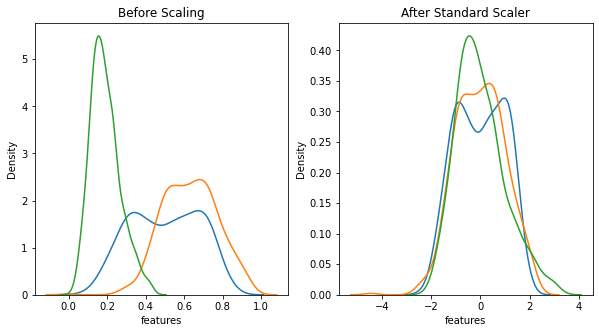

In [67]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))

ax1.set_title('Before Scaling')
ax1.set_xlabel('features')
sns.kdeplot(X_train.iloc[:,0], ax=ax1)
sns.kdeplot(X_train.iloc[:,1], ax=ax1)
sns.kdeplot(X_train.iloc[:,2], ax=ax1)

ax2.set_title('After Standard Scaler')
ax2.set_xlabel('features')
sns.kdeplot(X_train_scaled.iloc[:,0], ax=ax2)
sns.kdeplot(X_train_scaled.iloc[:,1], ax=ax2)
sns.kdeplot(X_train_scaled.iloc[:,2], ax=ax2)
plt.show()

For minmax normalization we could use the `sklearn.preprocessing` `MinMaxScaler` (For more information visit the [MinMaxScaler documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html))

The following is a usage example for `MinMaxScaler`, on our dataset:

In [68]:
minmax_scaler = preprocessing.MinMaxScaler(feature_range=(-1, 1))
X_train_minmax = pd.DataFrame(minmax_scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test_minmax = pd.DataFrame(minmax_scaler.transform(X_test), columns=X_test.columns, index=X_test.index)
X_train_minmax.head(3)

,temperature,humidity,wind_speed
220,0.784017,0.185282,-0.385791
650,-0.057066,0.120347,0.014861
275,-0.189977,0.580952,-0.709169


Text(0.5, 1.0, 'Before Scaling')

Text(0.5, 0, 'features')

<AxesSubplot:title={'center':'Before Scaling'}, xlabel='features', ylabel='Density'>

<AxesSubplot:title={'center':'Before Scaling'}, xlabel='features', ylabel='Density'>

<AxesSubplot:title={'center':'Before Scaling'}, xlabel='features', ylabel='Density'>

Text(0.5, 1.0, 'After Min-Max[-1,1] Scaler')

Text(0.5, 0, 'features')

<AxesSubplot:title={'center':'After Min-Max[-1,1] Scaler'}, xlabel='features', ylabel='Density'>

<AxesSubplot:title={'center':'After Min-Max[-1,1] Scaler'}, xlabel='features', ylabel='Density'>

<AxesSubplot:title={'center':'After Min-Max[-1,1] Scaler'}, xlabel='features', ylabel='Density'>

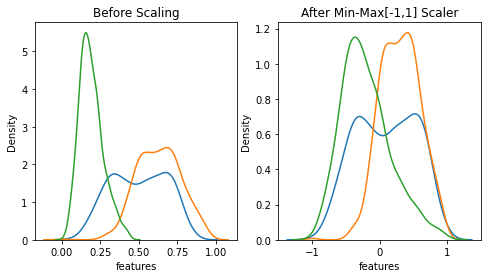

In [69]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4))

ax1.set_title('Before Scaling')
ax1.set_xlabel('features')
sns.kdeplot(X_train.iloc[:,0], ax=ax1)
sns.kdeplot(X_train.iloc[:,1], ax=ax1)
sns.kdeplot(X_train.iloc[:,2], ax=ax1)

ax2.set_title('After Min-Max[-1,1] Scaler')
ax2.set_xlabel('features')
sns.kdeplot(X_train_minmax.iloc[:,0], ax=ax2)
sns.kdeplot(X_train_minmax.iloc[:,1], ax=ax2)
sns.kdeplot(X_train_minmax.iloc[:,2], ax=ax2)
plt.show()

### Detect correlated features

The Pearson correlation coefficient is given as a build in 'corr' dataframe (for more information visit the [pandas dataframe corr documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html)).<br/>

In [72]:
trainset = pd.read_csv('./data/bicycle_rental.csv') 
df_numeric = trainset.select_dtypes(include=np.number)
df_numeric.corr()

,month_number,temperature,humidity,wind_speed,number_registered,count_rentals
month_number,1.000000,0.220205,0.222204,-0.207502,0.293488,0.279977
temperature,0.220205,1.000000,0.126963,-0.157944,0.540012,0.627494
humidity,0.222204,0.126963,1.000000,-0.248489,-0.091089,-0.100659
wind_speed,-0.207502,-0.157944,-0.248489,1.000000,-0.217449,-0.234545
number_registered,0.293488,0.540012,-0.091089,-0.217449,1.000000,0.945517
count_rentals,0.279977,0.627494,-0.100659,-0.234545,0.945517,1.000000


We could also use a visualization, with **the `sns` `heatmap` function**:

<Figure size 360x360 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'Pearson Correlation')

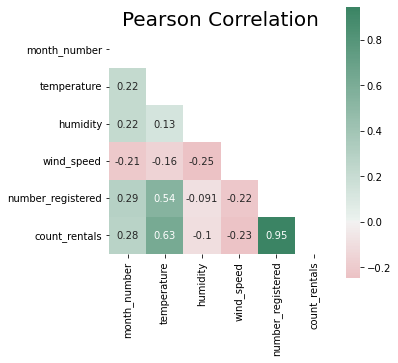

In [73]:
df_numeric = trainset._get_numeric_data()

mask = np.zeros_like(df_numeric.corr(),dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(10,150,as_cmap=True)

plt.figure(figsize=(5, 5))
sns.heatmap(df_numeric.corr(), cmap=cmap, annot=True, mask=mask, square=True, center=0)
plt.title('Pearson Correlation',size=20)
plt.show()

If we decide to remove features with **correlation > 0.8**, we need to **remove either 'number_registered' or 'count_rentals'**

### Dimensionality reduction

We could perform dimensionality reduction, instead or in addition to feature selection.<br/>

We will do this using the `sklearn.decomposition`'s `PCA` method (for more information visit the [sickit learn's PCA documentation](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)).<br/>

We could decide about the number of principal components, using the `n_components` parameter:

In [83]:
# Dimensionality reduction from n=6 to d=2. Linear combination that creates two columns out of the 6 we currently have.
pca = PCA(n_components=2)
reduced_data = pd.DataFrame(pca.fit_transform(df_numeric),columns=['x1', 'x2'],index=df_numeric.index)
df_numeric.head()
reduced_data.head()

pca.explained_variance_
pca.explained_variance_ratio_

,month_number,temperature,humidity,wind_speed,number_registered,count_rentals
0,1,0.344167,0.805833,0.160446,654,985
1,1,0.363478,0.696087,0.248539,670,801
2,1,0.196364,0.437273,0.248309,1229,1349
3,1,0.200000,0.590435,0.160296,1454,1562
4,1,0.226957,0.436957,0.186900,1518,1600


,x1,x2
0,4623.184922,158.221616
1,4757.211977,31.143895
2,3980.347547,-65.118885
3,3673.581932,-108.579627
4,3603.999268,-135.004075


array([6026503.43445468,  160685.777545  ])

array([0.97402756, 0.02597068])

Setting the parameter of the number of components to be less than one, set's the minimum number of components for a >= information of the given value:

In [6]:
pca = PCA(0.9)
reduced_data = pd.DataFrame(pca.fit_transform(df_numeric),columns=['x1'],index=df_numeric.index)
df_numeric.head()
reduced_data.shape[1]
reduced_data.head()
pca.explained_variance_
pca.explained_variance_ratio_
pca.components_

NameError: name 'df_numeric' is not defined

### Exercise 2 - Feature Engineering (part 2)

In this exercise, you will work on the iris dataset.
1. fit minmax scaler, between [0,1]  
  * fit and apply on train set
  * apply on test set
2. Detect correlated features on the scaled train set.
   * Display the correlation
   * assuming correlated values have a correlation of > 0.9, are there any correlations, neede to be filtered?
3. Perform dimensionality reduction, using PCA
   * Use components covering at least 0.9 of the information
   * how many components were used?

In [7]:
# import the iris dataset
iris_dataset =datasets.load_iris()
X = pd.DataFrame(iris_dataset.data, columns=iris_dataset.feature_names)
y = pd.Series(iris_dataset.target)
y.name = 'target'
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2, shuffle=True)
X_train.head(3)
y_train.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
22,4.6,3.6,1.0,0.2
15,5.7,4.4,1.5,0.4
65,6.7,3.1,4.4,1.4


22    0
15    0
65    1
Name: target, dtype: int32

In [8]:
# Exercise 2, part 1, your solution:
minmax_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
X_train_scaled = pd.DataFrame(minmax_scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(minmax_scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

X_train.head()
X_train_scaled.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
22,4.6,3.6,1.0,0.2
15,5.7,4.4,1.5,0.4
65,6.7,3.1,4.4,1.4
11,4.8,3.4,1.6,0.2
42,4.4,3.2,1.3,0.2


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
22,0.088235,0.666667,0.000000,0.041667
15,0.411765,1.000000,0.087719,0.125000
65,0.705882,0.458333,0.596491,0.541667
11,0.147059,0.583333,0.105263,0.041667
42,0.029412,0.500000,0.052632,0.041667


Correlated features according to correlation matrix, with threshold=0.9:
Indices: [[3, 2]]
Features: [('petal width (cm)', 'petal length (cm)')]


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
22,0.088235,0.666667,0.000000,0.041667
15,0.411765,1.000000,0.087719,0.125000
65,0.705882,0.458333,0.596491,0.541667


<Figure size 360x360 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'Pearson Correlation')

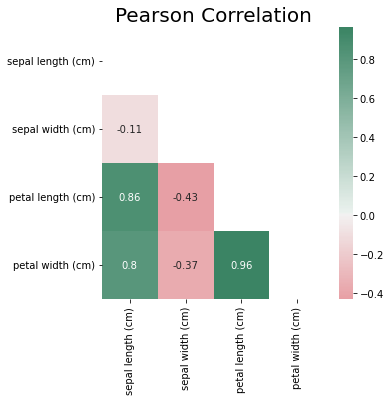

In [9]:
# Exercise 2, part 2, your solution:
df_numeric = X_train_scaled._get_numeric_data()
df_correlation = df_numeric.corr()

# Construct a lower trinagular matrix out of the correlation matrix, to avoid of having the same feature pair twice.
# T T T T
# F T T T
# F F T T
# F F F T
mask = np.triu(np.ones(df_correlation.shape)).astype(np.bool)

# Mask contains False at the bottom triangular of the matrix, and True otherwise. Hence use ~ to switch between False and True.
# This way we can keep each correlation once, and not twice (x1 with x2, and x2 with x1. Same features counted twice)
df_correlation = df_correlation.where(~mask)

thresh = 0.9
correlated_indices = np.argwhere(df_correlation[df_correlation > thresh].notnull().values).tolist()
correlated_features = [(df_correlation.index[x[0]], df_correlation.columns[x[1]]) for x in correlated_indices]
print(f'Correlated features according to correlation matrix, with threshold={thresh}:')
print(f'Indices: {correlated_indices}')
print(f'Features: {correlated_features}')
X_train_scaled.head(3)
cmap = sns.diverging_palette(10, 150, as_cmap=True)

plt.figure(figsize=(5, 5))
sns.heatmap(df_correlation, cmap=cmap, annot=True, center=0)
plt.title('Pearson Correlation', size=20)
plt.show()

In [167]:
# Exercise 2, part 3, your solution:
info_to_cover = 0.9
pca = PCA(info_to_cover)
reduced_scaled_data = pd.DataFrame(pca.fit_transform(X_train_scaled), index=df_numeric.index)

print(f'Amount of components needed to cover at least {info_to_cover} of the information: {reduced_scaled_data.shape[1]}\n')

X_train_scaled.head()
reduced_scaled_data.head()
pca.explained_variance_
pca.explained_variance_ratio_
pca.components_


Amount of components needed to cover at least 0.9 of the information: 2



,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
22,0.088235,0.666667,0.000000,0.041667
15,0.411765,1.000000,0.087719,0.125000
65,0.705882,0.458333,0.596491,0.541667
11,0.147059,0.583333,0.105263,0.041667
42,0.029412,0.500000,0.052632,0.041667


,0,1
22,-0.746424,0.083784
15,-0.548437,0.517837
65,0.243029,0.122000
11,-0.642004,0.029284
42,-0.713780,-0.094485


array([0.23872206, 0.03523595])

array([0.83325846, 0.12299094])

array([[ 0.43909978, -0.15342946,  0.62514752,  0.62677058],
       [ 0.45325756,  0.8882001 , -0.06788014, -0.03241079]])

<Figure size 360x288 with 0 Axes>

(-0.8619590061594228, 0.9002999594439578)

(-0.5956008855598203, 0.6178372351445656)

Text(0.5, 1.0, 'Iris trainset - scaled, reduced')

Text(0.5, 0, 'x1')

Text(0, 0.5, 'x2')

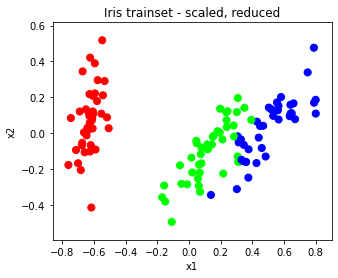

In [171]:
# We're throwing away useful information - don't do this at home!

# Create color maps\n",
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# plot data\n",
plt.figure(figsize=(5,4))
plt.scatter(reduced_scaled_data.iloc[:, 0], reduced_scaled_data.iloc[:, 1], c=y_train, marker=".", cmap=cmap_bold, s=200)


x_min, x_max = reduced_scaled_data.iloc[:, 0].min() - 0.1, reduced_scaled_data.iloc[:, 0].max() + 0.1
y_min, y_max = reduced_scaled_data.iloc[:, 1].min() - 0.1, reduced_scaled_data.iloc[:, 1].max() + 0.1
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.title('Iris trainset - scaled, reduced')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

## Hyper parameter tuning:

We can use the `sklearn.model_selection`'s function `GridSearchCV` in order to perform hyper parameter tuning.<br/>
This function performs a grid search on k-fold cross validation.<br/>
This means that for each predefined hyper-parameter and each predefined value it finds the best combination of hyper-parameter, value pairs for a given predefined evaluation metric. <br/>

For more information visit the [GridSearchCV documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

The following is an example of the usage of this function, for a KNN classifier

In [168]:
knn_classifier = KNeighborsClassifier()
knn_params = {
      'n_neighbors': [3, 5, 7, 9],
      'metric': ['euclidean', 'manhattan']
}

cls_cv = GridSearchCV(knn_classifier,knn_params,cv=10)

grid_search_res = cls_cv.fit(reduced_scaled_data, y_train)
'best_params:'
grid_search_res.best_params_
'best accuracy score:'
grid_search_res.best_score_
'average mean(cross-validation) accuracy:'
grid_search_res.cv_results_['mean_test_score'].mean()
'average std(cross-validation) accuracy:'
grid_search_res.cv_results_['std_test_score'].mean()

'best_params:'

{'metric': 'euclidean', 'n_neighbors': 5}

'best accuracy score:'

0.9583333333333333

'average mean(cross-validation) accuracy:'

0.953125

'average std(cross-validation) accuracy:'

0.06232584971874737